In [3]:
# machine learning classification
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score

# For data manipulation
import pandas as pd
import numpy as np

# To plot
import matplotlib.pyplot as plt
import seaborn

from sklearn.model_selection import train_test_split


In [10]:
ticker = "DOCU"

In [11]:
df = pd.read_csv(f'data/{ticker}_stock_data.csv', index_col = 'Unnamed: 0')
df.index = pd.to_datetime(df.index)

In [12]:
df.head()

,1. open,2. high,3. low,4. close,5. volume,IWO_5d_EMA,IWO_10d_EMA,IWO_150d_EMA,EMA_8,EMA_21,SMA_50,SMA_200
2018-05-08,41.50,43.6799,40.500,43.22,821183.0,191.3039,190.4679,183.4781,41.5352,NaN,NaN,NaN
2018-05-09,44.44,44.8700,43.245,44.10,1178122.0,192.3441,191.1873,183.6231,42.2763,NaN,NaN,NaN
2018-05-10,44.88,46.6990,43.660,44.01,1467879.0,193.4530,192.0025,183.7826,43.2591,NaN,NaN,NaN
2018-05-11,44.56,45.8895,44.010,44.37,762193.0,194.3656,192.7640,183.9470,43.8436,NaN,NaN,NaN
2018-05-14,44.99,45.7265,43.370,44.19,1032010.0,194.7091,193.2426,184.0986,44.2621,NaN,NaN,NaN


In [4]:
#use forward will to deal with null values 
#df = df.ffill()


In [13]:
df.tail()

,1. open,2. high,3. low,4. close,5. volume,IWO_5d_EMA,IWO_10d_EMA,IWO_150d_EMA,EMA_8,EMA_21,SMA_50,SMA_200
2021-01-15,251.35,256.4400,246.8897,249.28,2512615.0,306.3321,302.0388,245.4040,251.8323,244.5006,233.8883,194.0943
2021-01-19,251.80,260.3800,251.6400,256.57,3117730.0,308.6048,304.0591,246.3013,253.7318,245.9442,234.3891,194.9265
2021-01-20,260.82,262.4699,253.6950,255.31,2788219.0,310.5865,305.9665,247.2052,255.6736,247.4465,234.7185,195.8092
2021-01-21,257.68,257.6800,251.6500,253.94,1495684.0,311.0610,307.0653,248.0636,256.1194,248.3768,235.1591,196.6452
2021-01-22,253.02,257.1250,250.8800,255.15,1443826.0,312.7773,308.7280,248.9662,256.3429,249.1721,235.9813,197.4756


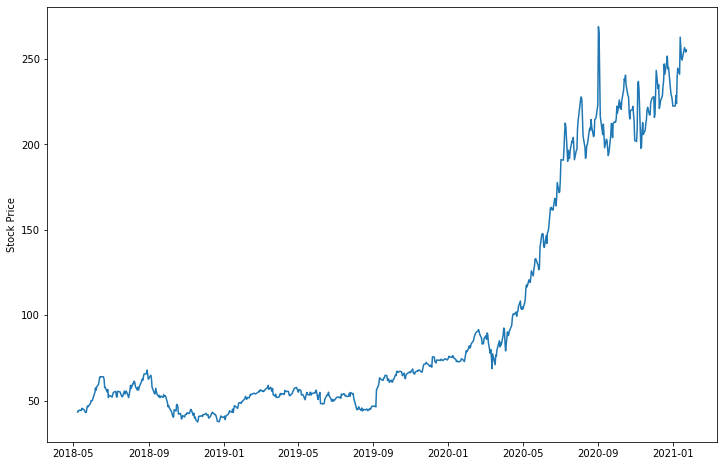

In [15]:
plt.figure(figsize=(12,8))
plt.plot(df['4. close'])
plt.ylabel('Stock Price');


In [16]:
close = df[['4. close']]
close.head()

,4. close
2018-05-08,43.22
2018-05-09,44.10
2018-05-10,44.01
2018-05-11,44.37
2018-05-14,44.19


In [17]:
close.tail()

,4. close
2021-01-15,249.28
2021-01-19,256.57
2021-01-20,255.31
2021-01-21,253.94
2021-01-22,255.15


In [18]:
forecast = 30
close['prediction'] = close[['4. close']].shift(-forecast)
close.tail()

<ipython-input-18-e652708e2a36>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close['prediction'] = close[['4. close']].shift(-forecast)


,4. close,prediction
2021-01-15,249.28,NaN
2021-01-19,256.57,NaN
2021-01-20,255.31,NaN
2021-01-21,253.94,NaN
2021-01-22,255.15,NaN


In [19]:
close.head()

,4. close,prediction
2018-05-08,43.22,62.46
2018-05-09,44.10,57.59
2018-05-10,44.01,57.55
2018-05-11,44.37,55.00
2018-05-14,44.19,56.47


In [20]:
X = np.array(close.drop(['prediction'], 1))
X = X[:-forecast]
X

array([[ 43.22 ],
       [ 44.1  ],
       [ 44.01 ],
       [ 44.37 ],
       [ 44.19 ],
       [ 45.46 ],
       [ 45.23 ],
       [ 44.9  ],
       [ 44.78 ],
       [ 42.98 ],
       [ 43.05 ],
       [ 45.42 ],
       [ 46.8  ],
       [ 46.37 ],
       [ 48.43 ],
       [ 49.99 ],
       [ 49.81 ],
       [ 50.12 ],
       [ 53.65 ],
       [ 54.59 ],
       [ 57.36 ],
       [ 55.99 ],
       [ 57.92 ],
       [ 59.54 ],
       [ 61.82 ],
       [ 63.77 ],
       [ 63.53 ],
       [ 63.95 ],
       [ 63.9  ],
       [ 63.87 ],
       [ 62.46 ],
       [ 57.59 ],
       [ 57.55 ],
       [ 55.   ],
       [ 56.47 ],
       [ 51.77 ],
       [ 53.04 ],
       [ 52.95 ],
       [ 52.34 ],
       [ 51.97 ],
       [ 54.62 ],
       [ 54.95 ],
       [ 55.35 ],
       [ 52.37 ],
       [ 51.98 ],
       [ 55.37 ],
       [ 55.33 ],
       [ 55.05 ],
       [ 54.09 ],
       [ 53.05 ],
       [ 52.36 ],
       [ 52.21 ],
       [ 55.53 ],
       [ 53.79 ],
       [ 54.69 ],
       [ 5

In [21]:
y = np.array(close['prediction'])
y = y[:-forecast]
y

array([ 62.46 ,  57.59 ,  57.55 ,  55.   ,  56.47 ,  51.77 ,  53.04 ,
        52.95 ,  52.34 ,  51.97 ,  54.62 ,  54.95 ,  55.35 ,  52.37 ,
        51.98 ,  55.37 ,  55.33 ,  55.05 ,  54.09 ,  53.05 ,  52.36 ,
        52.21 ,  55.53 ,  53.79 ,  54.69 ,  55.51 ,  54.82 ,  51.71 ,
        53.9  ,  55.75 ,  58.91 ,  57.01 ,  60.   ,  59.89 ,  61.35 ,
        60.45 ,  58.2  ,  56.14 ,  57.85 ,  56.15 ,  57.69 ,  58.68 ,
        61.22 ,  62.5  ,  61.84 ,  63.9  ,  65.54 ,  65.53 ,  66.3  ,
        67.87 ,  65.   ,  62.44 ,  64.85 ,  63.1  ,  57.85 ,  56.94 ,
        53.93 ,  53.96 ,  57.18 ,  55.37 ,  53.79 ,  52.18 ,  53.03 ,
        51.73 ,  52.23 ,  52.54 ,  51.83 ,  53.4  ,  52.54 ,  52.82 ,
        52.57 ,  48.85 ,  46.4  ,  47.11 ,  45.8  ,  45.27 ,  43.23 ,
        41.51 ,  40.6  ,  40.25 ,  44.64 ,  43.83 ,  47.72 ,  47.52 ,
        46.24 ,  42.005,  42.46 ,  41.33 ,  39.17 ,  40.32 ,  41.18 ,
        40.35 ,  41.74 ,  41.94 ,  41.85 ,  42.82 ,  42.41 ,  42.55 ,
        43.88 ,  44.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
SVR = SVR(kernel = 'rbf', C=1e3, gamma =0.1)
SVR.fit(X_train, y_train)
SVR.score(X_test, y_test)

0.9493269884754681

In [24]:
X_forecast = np.array(close.drop(['prediction'], 1))[-forecast:]
X_forecast

array([[220.97],
       [222.59],
       [225.49],
       [228.33],
       [233.7 ],
       [237.08],
       [247.  ],
       [241.  ],
       [248.  ],
       [251.6 ],
       [244.05],
       [244.93],
       [229.2 ],
       [228.16],
       [225.9 ],
       [222.3 ],
       [222.41],
       [228.5 ],
       [223.85],
       [239.03],
       [244.54],
       [240.96],
       [262.65],
       [255.85],
       [250.25],
       [249.28],
       [256.57],
       [255.31],
       [253.94],
       [255.15]])

In [25]:
SVM_prediction = SVR.predict(X_forecast)
SVM_prediction

array([214.01480399, 228.01235222, 214.78087336, 215.13502357,
       248.48893637, 224.54240634, 163.96333641, 233.13237039,
       161.2645006 , 160.03143702, 200.30847641, 183.92774012,
       214.78053486, 213.82472251, 206.71271044, 222.78660033,
       224.72267671, 216.02594137, 242.39103908, 209.92521228,
       190.70705793, 232.77265071, 195.6960647 , 160.03851608,
       160.07340718, 160.24128196, 160.06766443, 160.03136931,
       160.027674  , 160.03029728])

In [27]:
SVM_prediction.mean()

197.94858926491935

<ipython-input-29-8f62f246616e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions #Create a new column called 'Predictions' that will hold the predicted prices


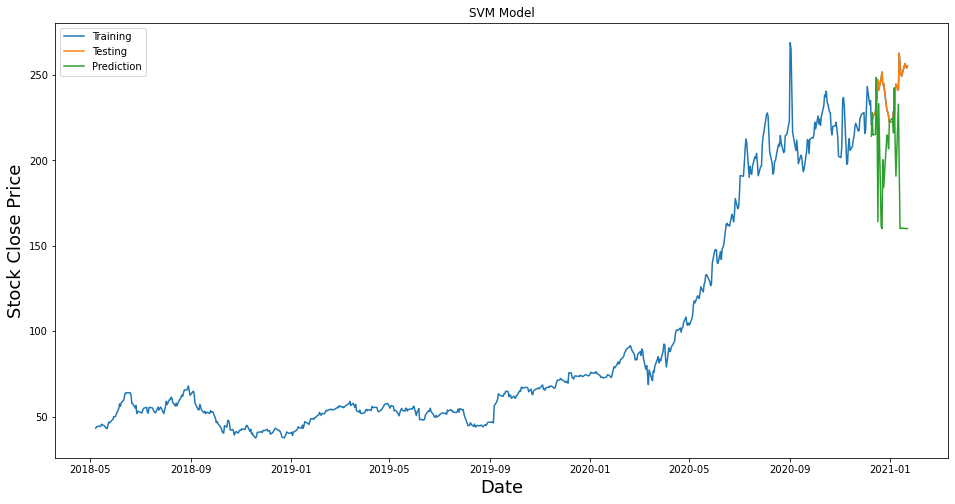

In [29]:
#Visualize the data
predictions = SVM_prediction
#Plot the data
valid =  close[X.shape[0]:]
valid['Predictions'] = predictions #Create a new column called 'Predictions' that will hold the predicted prices
plt.figure(figsize=(16,8))
plt.title('SVM Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Stock Close Price',fontsize=18)
plt.plot(close['4. close'])
plt.plot(valid[['4. close','Predictions']])
plt.legend(['Training', 'Testing', 'Prediction' ], loc='best')
plt.show()